In [218]:
import pandas as pd

total_zoning_districts_df = pd.read_excel('total_zoning_districts.xlsx')
total_zoning_districts_df.head()

,State,Total Local Government Units,General Purpose,Special Districts,State.1,Total Local Units Per 100K,General Purpose Governments Per 100K,Special Districts Per 100K
0,Alabama,1195,528,667,Alabama,24.5,10.8,13.7
1,Alaska,179,164,15,Alaska,24.2,22.2,2.0
2,Arizona,658,106,552,Arizona,9.3,1.5,7.8
3,Arkansas,1541,576,965,Arkansas,51.3,19.2,32.1
4,California,4444,539,3905,California,11.3,1.4,9.9


In [219]:
total_zoning_districts_df.drop('State.1', axis=1, inplace=True)
total_zoning_districts_df.head()

,State,Total Local Government Units,General Purpose,Special Districts,Total Local Units Per 100K,General Purpose Governments Per 100K,Special Districts Per 100K
0,Alabama,1195,528,667,24.5,10.8,13.7
1,Alaska,179,164,15,24.2,22.2,2.0
2,Arizona,658,106,552,9.3,1.5,7.8
3,Arkansas,1541,576,965,51.3,19.2,32.1
4,California,4444,539,3905,11.3,1.4,9.9


In [220]:
total_zoning_districts_df.drop(['Special Districts', 'General Purpose','General Purpose Governments Per 100K','Special Districts Per 100K'], axis=1, inplace=True)
total_zoning_districts_df.head()

,State,Total Local Government Units,Total Local Units Per 100K
0,Alabama,1195,24.5
1,Alaska,179,24.2
2,Arizona,658,9.3
3,Arkansas,1541,51.3
4,California,4444,11.3


In [221]:
nzlud_muni_df = pd.read_csv('nzlud_muni.csv', encoding='latin1')
nzlud_muni_df

nzlud_muni_df.drop(nzlud_muni_df.columns.difference(['statename']), axis=1, inplace=True)
nzlud_muni_df.head()
nzlud_muni_df.drop_duplicates(inplace=True)
nzlud_muni_df.reset_index(drop=True, inplace=True)
nzlud_muni_df.head()

,statename
0,AL
1,AK
2,AZ
3,AR
4,CA


In [222]:

# Dictionary to map long-form state names to short-form state names
state_name_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Assuming the column with long-form state names is named 'statename'
total_zoning_districts_df['State'] = total_zoning_districts_df['State'].map(state_name_mapping)
total_zoning_districts_df.head()

,State,Total Local Government Units,Total Local Units Per 100K
0,AL,1195,24.5
1,AK,179,24.2
2,AZ,658,9.3
3,AR,1541,51.3
4,CA,4444,11.3


In [223]:
import plotly.express as px

fig = px.choropleth(total_zoning_districts_df, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='Total Local Government Units',
                    scope='usa',
                    title='Total Zoning Districts by State')

# Update the layout to set better dimensions
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

In [224]:


df_mleczko = pd.read_csv("C:\\Users\\clint\\Desktop\\NZLUD_Checker\\old\\Wills_Python_NZLUD\\Mleczko_data.csv")
def extract_filename(path):
    """
    Extracts the filename without extension from a given file path.

    Parameters:
    path (str): The file path from which to extract the filename.

    Returns:
    str: The filename without its extension.
    """
    import os
    # Extract the base name of the file (e.g., 'AZ_Glendale.txt')
    base_name = os.path.basename(path)
    # Split the base name by '.' and return the first part (e.g., 'AZ_Glendale')
    return os.path.splitext(base_name)[0]
df_mleczko['muni'] = df_mleczko['muni'].apply(extract_filename)
df_mleczko = df_mleczko.set_index('muni')
df_mleczko = df_mleczko.sort_index()




# Extract the first two letters from the index of df_will_filtered
first_two_letters = [str(index)[:2] for index in df_mleczko.index]

import plotly.express as px
from collections import Counter
import pandas as pd

# List of state abbreviations
state_abbreviations = first_two_letters

# Count the occurrences of each state abbreviation
state_counts = Counter(state_abbreviations)

# Prepare the data for visualization
data = {
    "state": list(state_counts.keys()),
    "count": list(state_counts.values())
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map using plotly
fig = px.choropleth(
    df,
    locations="state",
    locationmode="USA-states",
    color="count",
    scope="usa",
)

# Update the layout to adjust the width and height
fig.update_layout(
    title="Total State Count",
    width=800,  # Adjust the width as needed
    height=500  # Adjust the height as needed
)

# Show the map
fig.show()

In [225]:


df_state_counts = pd.DataFrame.from_dict(state_counts, orient='index', columns=['count'])
df_state_counts.reset_index(inplace=True)
df_state_counts.rename(columns={'index': 'state'}, inplace=True)
df_state_counts.head()

,state,count
0,AK,7
1,AL,34
2,AR,17
3,AZ,40
4,CA,184


In [226]:
total_zoning_districts_df.head()



,State,Total Local Government Units,Total Local Units Per 100K
0,AL,1195,24.5
1,AK,179,24.2
2,AZ,658,9.3
3,AR,1541,51.3
4,CA,4444,11.3


In [227]:
combined_df = total_zoning_districts_df.merge(df_state_counts, left_on='State', right_on='state')
combined_df.head()  

,State,Total Local Government Units,Total Local Units Per 100K,state,count
0,AL,1195,24.5,AL,34
1,AK,179,24.2,AK,7
2,AZ,658,9.3,AZ,40
3,AR,1541,51.3,AR,17
4,CA,4444,11.3,CA,184


In [228]:
combined_df.drop('state', axis=1, inplace=True)
combined_df.head()

,State,Total Local Government Units,Total Local Units Per 100K,count
0,AL,1195,24.5,34
1,AK,179,24.2,7
2,AZ,658,9.3,40
3,AR,1541,51.3,17
4,CA,4444,11.3,184


In [229]:
combined_df.rename(columns={'count': 'Data_Sample'}, inplace=True)
combined_df.head()

,State,Total Local Government Units,Total Local Units Per 100K,Data_Sample
0,AL,1195,24.5,34
1,AK,179,24.2,7
2,AZ,658,9.3,40
3,AR,1541,51.3,17
4,CA,4444,11.3,184


In [230]:
combined_df.set_index('State', inplace=True)

In [231]:
combined_df.drop('Total Local Units Per 100K', axis=1, inplace=True)
combined_df.head()

,Total Local Government Units,Data_Sample
State,,
AL,1195,34
AK,179,7
AZ,658,40
AR,1541,17
CA,4444,184


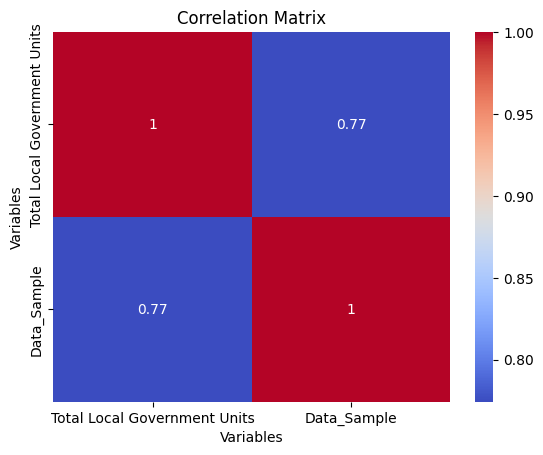

In [232]:



# Create the correlation matrix
correlation_matrix = combined_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [233]:
combined_df['Sample/Total'] = combined_df['Data_Sample'] / combined_df['Total Local Government Units']

In [247]:
import plotly.express as px

fig = px.choropleth(combined_df, 
                    locations=combined_df.index, 
                    locationmode='USA-states', 
                    color='Sample/Total',
                    scope='usa',
                    title='Sample/Total Zoning Districts by State',
                    range_color=(0, 0.125))  # Adjust the range to make the scale tighter

# Update the layout to set better dimensions
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()